In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('movie_metadata.csv')


pd.set_option('display.max_columns', None)

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

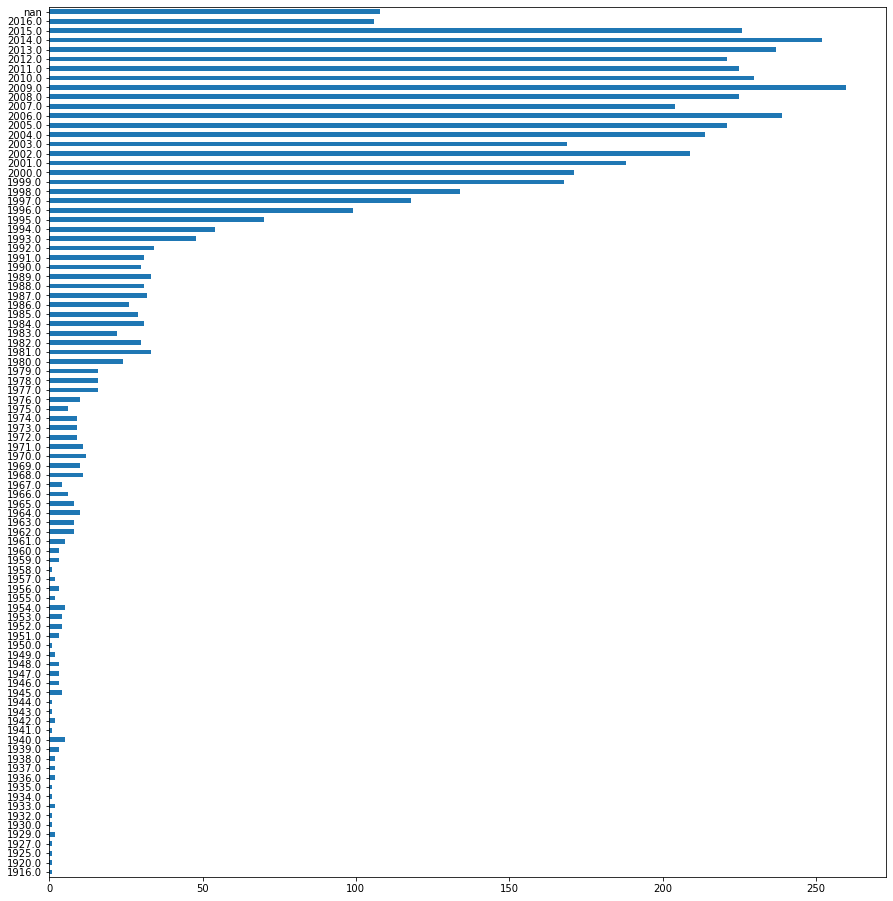

In [7]:
#checking how many movies got released in every year
data['title_year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [8]:
(data.movie_title == 'Toy Story\xa0').sum()

1

In [9]:
data.loc[data.movie_title=='Toy Story\xa0',['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
1588,John Lasseter,Tom Hanks,John Ratzenberger,Jim Varney,Adventure|Animation|Comedy|Family|Fantasy,Toy Story


In [10]:
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [11]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [12]:
print(data['actor_1_name'].isnull().sum())
print(data['actor_2_name'].isnull().sum())
print(data['actor_3_name'].isnull().sum())
print(data['director_name'].isnull().sum())

7
13
23
104


In [13]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [14]:
data['genres'] = data['genres'].replace('|', ' ')

In [15]:
data['movie_title'] = data['movie_title'].str.lower()

In [16]:
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [17]:
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [18]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [19]:
data.to_csv('data.csv',index=False)

In [20]:
credits = pd.read_csv('credits.csv')

In [21]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [22]:
meta = pd.read_csv('movies_metadata.csv')

pd.set_option('display.max_columns', None)


D:\material\anac\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,Fa

In [24]:
meta['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [25]:
meta['release_date'].isnull().sum()

87

In [26]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [27]:
meta['release_date'].isnull().sum()

90

In [28]:
meta['year'] = meta['release_date'].dt.year

In [29]:
meta['year'].head()

0    1995.0
1    1995.0
2    1995.0
3    1995.0
4    1995.0
Name: year, dtype: float64

In [30]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [31]:
# Getting only 2017 movies as we already have movies up to the year 2016 
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [32]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [33]:
new_meta.dtypes


genres     object
id         object
title      object
year      float64
dtype: object

In [34]:
# we will make id as type int because we need to merge it with credits.csv dataframe
new_meta['id'] = new_meta['id'].astype(int)

In [35]:
data = pd.merge(new_meta, credits, on='id')

In [36]:
data.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [37]:
pd.set_option('display.max_columns', None)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_i...","[{'credit_id': '597e22f69251415d7801c74a', 'de..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmon...","[{'credit_id': '593ba0c29251410593009be3', 'de..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'de..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de..."


In [38]:
# genres is in the form of key value pairs and we want to takeout only genre name

In [39]:
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [40]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [41]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [42]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [43]:
data.head()

,genres,id,title,year,cast,crew,genres_list
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...",Adventure Action Fantasy Comedy
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...",Action Adventure Fantasy Sci-Fi
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de...",Action Adventure Fantasy Sci-Fi
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",Action Adventure Comedy Sci-Fi
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de...",Fantasy Action Adventure


In [44]:
data['cast']

0      [{'cast_id': 1, 'character': 'Captain Jack Spa...
1      [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...
2      [{'cast_id': 0, 'character': 'Thor Odinson', '...
3      [{'cast_id': 3, 'character': 'Peter Quill / St...
4      [{'cast_id': 0, 'character': 'King Louis XIV',...
                             ...                        
526    [{'cast_id': 0, 'character': 'Satu', 'credit_i...
527    [{'cast_id': 0, 'character': 'Detective Simmon...
528                                                   []
529    [{'cast_id': 1, 'character': 'Devki Sabarwal',...
530                                                   []
Name: cast, Length: 531, dtype: object

In [45]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [46]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [47]:
data['actor_1_name'].head()

0        Johnny Depp
1        Ben Affleck
2    Chris Hemsworth
3        Chris Pratt
4     Pierce Brosnan
Name: actor_1_name, dtype: object

In [48]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [49]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [50]:
data['actor_2_name'].head()

0     Javier Bardem
1      Henry Cavill
2    Tom Hiddleston
3       Zoe Saldana
4      William Hurt
Name: actor_2_name, dtype: object

In [51]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [52]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [53]:
data['actor_3_name'].head()

0      Geoffrey Rush
1          Gal Gadot
2     Cate Blanchett
3      Dave Bautista
4    Benjamin Walker
Name: actor_3_name, dtype: object

In [54]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt)) # to get all directors name

In [55]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [56]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [57]:
data.head()

,genres,id,title,year,cast,crew,genres_list,actor_1_name,actor_2_name,actor_3_name,director_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...",Adventure Action Fantasy Comedy,Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...",Action Adventure Fantasy Sci-Fi,Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de...",Action Adventure Fantasy Sci-Fi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Taika Waititi
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",Action Adventure Comedy Sci-Fi,Chris Pratt,Zoe Saldana,Dave Bautista,James Gunn
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de...",Fantasy Action Adventure,Pierce Brosnan,William Hurt,Benjamin Walker,Sean McNamara


In [58]:
data.columns

Index(['genres', 'id', 'title', 'year', 'cast', 'crew', 'genres_list',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'],
      dtype='object')

In [59]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [60]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


In [61]:
movie.describe

<bound method NDFrame.describe of                       director_name          actor_1_name    actor_2_name  \
0    Joachim Rønning Espen Sandberg           Johnny Depp   Javier Bardem   
1                       Zack Snyder           Ben Affleck    Henry Cavill   
2                     Taika Waititi       Chris Hemsworth  Tom Hiddleston   
3                        James Gunn           Chris Pratt     Zoe Saldana   
4                     Sean McNamara        Pierce Brosnan    William Hurt   
..                              ...                   ...             ...   
526                Hannaleena Hauru        Inka Haapamäki   Rosa Honkonen   
527           Jonathan A. Rosenbaum  Lou Diamond Phillips   Wallace Shawn   
528        Beth David Esteban Bravo                   NaN             NaN   
529                    Ravi Udyawar        Sridevi Kapoor       Sajal Ali   
530                   Daisy Asquith                   NaN             NaN   

        actor_3_name                     

In [62]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [63]:
movie = movie.dropna(how='any')

In [64]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [65]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,The Incredible Jessica James
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,Can't Buy My Love
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit


In [66]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [67]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [68]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Se...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [69]:
old = pd.read_csv('data.csv')

In [70]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,shanghai calling


In [71]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [72]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott S...
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknow...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benja...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsi...


In [73]:
new = old.append(movie)

In [74]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [75]:
new['movie_title'].duplicated().any()

True

In [76]:
new['movie_title'].duplicated().sum()

137

In [77]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [78]:
new['movie_title'].duplicated().any()

False

In [79]:
new


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [80]:
new.to_csv('new_data.csv',index=False)

In [81]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]


In [82]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [83]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6]
...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,[163]
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,[137]
266,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,[226]
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",[258]


In [84]:
from tmdbv3api import TMDb

In [85]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '760b22815c4e84718ef38d57335067e8'

In [86]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        genre_list = str(genres)
        return genre_list
#         return genre_str.join(genre_list)
    else:
        np.NaN

In [87]:
df['Genre'] = df['Title'].map(lambda x: get_genre(str(x)))

In [88]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,Genre
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],"['Horror', 'Mystery', 'Thriller']"
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],"['Thriller', 'Drama']"
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4],"['Action', 'Thriller']"
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],"['Drama', 'History', 'Western']"
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],"['Action', 'Thriller']"
...,...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,[163],"['Mystery', 'Adventure', 'Comedy', 'Crime']"
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,[137],"['Drama', 'History', 'Comedy']"
266,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,[226],"['Drama', 'History']"
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",[258],"['Thriller', 'Crime', 'Drama', 'Action']"


In [89]:
df_2018 = df[['Title','Cast and crew','Genre']]

In [90]:
df_2018

,Title,Cast and crew,Genre
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,"['Horror', 'Mystery', 'Thriller']"
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,"['Thriller', 'Drama']"
2,Stratton,"Simon West (director); Duncan Falconer, Warren...","['Action', 'Thriller']"
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...","['Drama', 'History', 'Western']"
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,"['Action', 'Thriller']"
...,...,...,...
264,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,"['Mystery', 'Adventure', 'Comedy', 'Crime']"
265,Vice,Adam McKay (director/screenplay); Christian Ba...,"['Drama', 'History', 'Comedy']"
266,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,"['Drama', 'History']"
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...","['Thriller', 'Crime', 'Drama', 'Action']"


In [91]:
df_2018

,Title,Cast and crew,Genre
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,"['Horror', 'Mystery', 'Thriller']"
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,"['Thriller', 'Drama']"
2,Stratton,"Simon West (director); Duncan Falconer, Warren...","['Action', 'Thriller']"
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...","['Drama', 'History', 'Western']"
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,"['Action', 'Thriller']"
...,...,...,...
264,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,"['Mystery', 'Adventure', 'Comedy', 'Crime']"
265,Vice,Adam McKay (director/screenplay); Christian Ba...,"['Drama', 'History', 'Comedy']"
266,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,"['Drama', 'History']"
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...","['Thriller', 'Crime', 'Drama', 'Action']"


In [92]:
df_2018['genres'] = df_2018['Genre'].str.replace(',', '')

D:\material\anac\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_2018

,Title,Cast and crew,Genre,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,"['Horror', 'Mystery', 'Thriller']",['Horror' 'Mystery' 'Thriller']
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,"['Thriller', 'Drama']",['Thriller' 'Drama']
2,Stratton,"Simon West (director); Duncan Falconer, Warren...","['Action', 'Thriller']",['Action' 'Thriller']
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...","['Drama', 'History', 'Western']",['Drama' 'History' 'Western']
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,"['Action', 'Thriller']",['Action' 'Thriller']
...,...,...,...,...
264,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,"['Mystery', 'Adventure', 'Comedy', 'Crime']",['Mystery' 'Adventure' 'Comedy' 'Crime']
265,Vice,Adam McKay (director/screenplay); Christian Ba...,"['Drama', 'History', 'Comedy']",['Drama' 'History' 'Comedy']
266,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,"['Drama', 'History']",['Drama' 'History']
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...","['Thriller', 'Crime', 'Drama', 'Action']",['Thriller' 'Crime' 'Drama' 'Action']


In [94]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [95]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

D:\material\anac\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_2018.head()

,Title,Cast and crew,Genre,genres,director_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,"['Horror', 'Mystery', 'Thriller']",['Horror' 'Mystery' 'Thriller'],Adam Robitel
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,"['Thriller', 'Drama']",['Thriller' 'Drama'],Lauren Wolkstein
2,Stratton,"Simon West (director); Duncan Falconer, Warren...","['Action', 'Thriller']",['Action' 'Thriller'],Simon West
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...","['Drama', 'History', 'Western']",['Drama' 'History' 'Western'],Warwick Thornton
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,"['Action', 'Thriller']",['Action' 'Thriller'],Jaume Collet-Serra


In [97]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [98]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

D:\material\anac\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
df_2018.head()

,Title,Cast and crew,Genre,genres,director_name,actor_1_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,"['Horror', 'Mystery', 'Thriller']",['Horror' 'Mystery' 'Thriller'],Adam Robitel,Lin Shaye
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,"['Thriller', 'Drama']",['Thriller' 'Drama'],Lauren Wolkstein,Alex Pettyfer
2,Stratton,"Simon West (director); Duncan Falconer, Warren...","['Action', 'Thriller']",['Action' 'Thriller'],Simon West,Dominic Cooper
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...","['Drama', 'History', 'Western']",['Drama' 'History' 'Western'],Warwick Thornton,Bryan Brown
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,"['Action', 'Thriller']",['Action' 'Thriller'],Jaume Collet-Serra,Liam Neeson


In [100]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [101]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

In [102]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [103]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

In [104]:
df_2018

,Title,Cast and crew,Genre,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,"['Horror', 'Mystery', 'Thriller']",['Horror' 'Mystery' 'Thriller'],Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,"['Thriller', 'Drama']",['Thriller' 'Drama'],Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren...","['Action', 'Thriller']",['Action' 'Thriller'],Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...","['Drama', 'History', 'Western']",['Drama' 'History' 'Western'],Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,"['Action', 'Thriller']",['Action' 'Thriller'],Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...,...
264,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,"['Mystery', 'Adventure', 'Comedy', 'Crime']",['Mystery' 'Adventure' 'Comedy' 'Crime'],Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
265,Vice,Adam McKay (director/screenplay); Christian Ba...,"['Drama', 'History', 'Comedy']",['Drama' 'History' 'Comedy'],Adam McKay,Christian Bale,Amy Adams,Steve Carell
266,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,"['Drama', 'History']",['Drama' 'History'],Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...","['Thriller', 'Crime', 'Drama', 'Action']",['Thriller' 'Crime' 'Drama' 'Action'],Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [105]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})
df_2018

,movie_title,Cast and crew,Genre,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,"['Horror', 'Mystery', 'Thriller']",['Horror' 'Mystery' 'Thriller'],Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,"['Thriller', 'Drama']",['Thriller' 'Drama'],Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren...","['Action', 'Thriller']",['Action' 'Thriller'],Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...","['Drama', 'History', 'Western']",['Drama' 'History' 'Western'],Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,"['Action', 'Thriller']",['Action' 'Thriller'],Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...,...
264,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,"['Mystery', 'Adventure', 'Comedy', 'Crime']",['Mystery' 'Adventure' 'Comedy' 'Crime'],Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
265,Vice,Adam McKay (director/screenplay); Christian Ba...,"['Drama', 'History', 'Comedy']",['Drama' 'History' 'Comedy'],Adam McKay,Christian Bale,Amy Adams,Steve Carell
266,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,"['Drama', 'History']",['Drama' 'History'],Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...","['Thriller', 'Crime', 'Drama', 'Action']",['Thriller' 'Crime' 'Drama' 'Action'],Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [106]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [107]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,['Horror' 'Mystery' 'Thriller'],Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,['Thriller' 'Drama'],The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,['Action' 'Thriller'],Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,['Drama' 'History' 'Western'],Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,['Action' 'Thriller'],The Commuter
...,...,...,...,...,...,...
264,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,['Mystery' 'Adventure' 'Comedy' 'Crime'],Holmes & Watson
265,Adam McKay,Christian Bale,Amy Adams,Steve Carell,['Drama' 'History' 'Comedy'],Vice
266,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,['Drama' 'History'],On the Basis of Sex
267,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,['Thriller' 'Crime' 'Drama' 'Action'],Destroyer


In [108]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [109]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [110]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [111]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,['Horror' 'Mystery' 'Thriller'],insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,['Thriller' 'Drama'],the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,['Action' 'Thriller'],stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,['Drama' 'History' 'Western'],sweet country,Bryan Brown Sam Neill unknown Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,['Action' 'Thriller'],the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
...,...,...,...,...,...,...,...
264,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,['Mystery' 'Adventure' 'Comedy' 'Crime'],holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan ...
265,Adam McKay,Christian Bale,Amy Adams,Steve Carell,['Drama' 'History' 'Comedy'],vice,Christian Bale Amy Adams Steve Carell Adam McK...
266,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,['Drama' 'History'],on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mim...
267,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,['Thriller' 'Crime' 'Drama' 'Action'],destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Kary...


### Extracting features of 2019 movies from Wikipedia

In [112]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]
df5 = pd.read_html(link, header=0)[6]

In [113]:
data =  df1.append(df2.append(df3.append(df4.append(df5,ignore_index=True),ignore_index=True),ignore_index=True),ignore_index=True)

In [114]:
data.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,Unnamed: 0,"Wikimedia Commons has media related to Films of the United States, 2019."
0,JANUARY,4.0,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria...",[2],NaN,NaN
1,JANUARY,4.0,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,[3],NaN,NaN
2,JANUARY,4.0,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4],NaN,NaN
3,JANUARY,11.0,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5],NaN,NaN
4,JANUARY,11.0,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6],NaN,NaN


In [115]:
data['genres'] = data['Title'].map(lambda x: get_genre(str(x)))

In [116]:
data

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,Unnamed: 0,"Wikimedia Commons has media related to Films of the United States, 2019.",genres
0,JANUARY,4.0,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria...",[2],NaN,NaN,"['Thriller', 'Action', 'Mystery', 'Adventure',..."
1,JANUARY,4.0,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,[3],NaN,NaN,"['Thriller', 'Drama']"
2,JANUARY,4.0,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4],NaN,NaN,['Thriller']
3,JANUARY,11.0,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5],NaN,NaN,"['Drama', 'Adventure', 'Family']"
4,JANUARY,11.0,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6],NaN,NaN,"['Comedy', 'Drama']"
...,...,...,...,...,...,...,...,...,...
237,DECEMBER,25.0,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin ...,"Nick Bruno, Troy Quane (directors); Brad Copel...",[132],NaN,NaN,"['Animation', 'Action', 'Adventure', 'Comedy',..."
238,DECEMBER,25.0,Little Women,Columbia Pictures / Regency Enterprises,Greta Gerwig (director/screenplay); Saoirse Ro...,[221],NaN,NaN,"['Drama', 'Romance']"
239,DECEMBER,25.0,1917,Universal Pictures / DreamWorks Pictures / Ent...,Sam Mendes (director/screenplay); Krysty Wilso...,[222],NaN,NaN,"['War', 'Drama', 'Action', 'Thriller']"
240,DECEMBER,25.0,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), A...",[223],NaN,NaN,"['Drama', 'Crime', 'History']"


In [117]:
df_2019 = data[['Title','Cast and crew','genres']]

In [118]:
df_2019.head(10)

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria...","['Thriller', 'Action', 'Mystery', 'Adventure',..."
1,Rust Creek,Jen McGowan (director); Julie Lipson (screenpl...,"['Thriller', 'Drama']"
2,American Hangman,Wilson Coneybeare (director/screenplay); Donal...,['Thriller']
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Came...,"['Drama', 'Adventure', 'Family']"
4,The Upside,Neil Burger (director); Jon Hartmere (screenpl...,"['Comedy', 'Drama']"
5,Replicas,Jeffrey Nachmanoff (director); Chad St. John (...,"['Thriller', 'Science Fiction']"
6,After Darkness,Batán Silva (director); Fernando Diez Barroso ...,"['Drama', 'Family', 'Thriller', 'Science Ficti..."
7,Glass,M. Night Shyamalan (director/screenplay); Jame...,"['Thriller', 'Drama', 'Science Fiction']"
8,Close,"Vicky Jewson (director); Vicky Jewson, Rupert ...","['Action', 'Thriller']"
9,The Standoff at Sparrow Creek,Henry Dunham (director/screenplay); James Badg...,"['Drama', 'Thriller', 'Mystery']"


In [119]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

D:\material\anac\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

D:\material\anac\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\material\anac\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\material\anac\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [121]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')
new_df19['movie_title'] = new_df19['movie_title'].str.lower()
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']


In [122]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,"['Thriller', 'Action', 'Mystery', 'Adventure',...",escape room,Taylor Russell Logan Miller Deborah Ann Woll A...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,"['Thriller', 'Drama']",rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,['Thriller'],american hangman,Donald Sutherland Vincent Kartheiser Oliver De...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,"['Drama', 'Adventure', 'Family']",a dog's way home,Bryce Dallas Howard Edward James Olmos Alexand...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,"['Comedy', 'Drama']",the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil B...
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,"['Animation', 'Action', 'Adventure', 'Comedy',...",spies in disguise,Will Smith Tom Holland Rashida Jones Nick Brun...
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,"['Drama', 'Romance']",little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,"['War', 'Drama', 'Action', 'Thriller']",1917,George MacKay Dean-Charles Chapman Mark Strong...
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,"['Drama', 'Crime', 'History']",just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...


In [123]:
my_df = new_df18.append(new_df19,ignore_index=True)

In [124]:
old_df = pd.read_csv('new_data.csv')

In [125]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [126]:
final_dataframe = old_df.append(my_df,ignore_index=True)

In [127]:
final_dataframe

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5870,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,"['Animation', 'Action', 'Adventure', 'Comedy',...",spies in disguise,Will Smith Tom Holland Rashida Jones Nick Brun...
5871,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,"['Drama', 'Romance']",little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
5872,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,"['War', 'Drama', 'Action', 'Thriller']",1917,George MacKay Dean-Charles Chapman Mark Strong...
5873,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,"['Drama', 'Crime', 'History']",just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...


In [132]:
def list_to_string(x):
    if x:
        return x.replace(',', '').replace('[','').replace(']','').replace("'",'')
    else:
        return np.NaN

In [133]:
final_dataframe['genres'] = final_dataframe['genres'].map(lambda x: list_to_string(x))

In [134]:
final_dataframe

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5870,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,Will Smith Tom Holland Rashida Jones Nick Brun...
5871,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
5872,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong...
5873,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...


In [135]:
final_dataframe['comb'] = final_dataframe['actor_1_name'] + ' ' + final_dataframe['actor_2_name'] + ' '+ final_dataframe['actor_3_name'] + ' '+ final_dataframe['director_name'] +' ' + final_dataframe['genres']

In [145]:
final_dataframe.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           3
movie_title      0
comb             3
dtype: int64

In [150]:
final_dataframe = final_dataframe.dropna(how='any')

In [153]:
final_dataframe.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [154]:
final_dataframe

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5870,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,Will Smith Tom Holland Rashida Jones Nick Brun...
5871,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
5872,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong...
5873,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...


In [151]:
final_dataframe.to_csv('complete_final_dataset.csv',index=False)